You are given an undirected weighted connected graph containing n nodes labeled from 0 to n - 1, and an integer array edges where edges[i] = [ai, bi, wi] indicates that there is an edge between nodes ai and bi with weight wi.

Some edges have a weight of -1 (wi = -1), while others have a positive weight (wi > 0).

Your task is to modify all edges with a weight of -1 by assigning them positive integer values in the range [1, 2 * 109] so that the shortest distance between the nodes source and destination becomes equal to an integer target. If there are multiple modifications that make the shortest distance between source and destination equal to target, any of them will be considered correct.

Return an array containing all edges (even unmodified ones) in any order if it is possible to make the shortest distance from source to destination equal to target, or an empty array if it's impossible.

Note: You are not allowed to modify the weights of edges with initial positive weights.

 

Example 1:

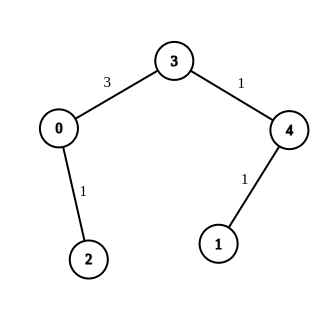

Input: n = 5, edges = [[4,1,-1],[2,0,-1],[0,3,-1],[4,3,-1]], source = 0, destination = 1, target = 5
Output: [[4,1,1],[2,0,1],[0,3,3],[4,3,1]]
Explanation: The graph above shows a possible modification to the edges, making the distance from 0 to 1 equal to 5.

Example 2:

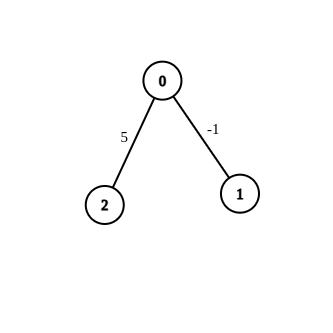

Input: n = 3, edges = [[0,1,-1],[0,2,5]], source = 0, destination = 2, target = 6
Output: []
Explanation: The graph above contains the initial edges. It is not possible to make the distance from 0 to 2 equal to 6 by modifying the edge with weight -1. So, an empty array is returned.

Example 3:

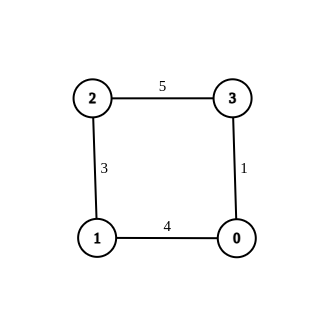

Input: n = 4, edges = [[1,0,4],[1,2,3],[2,3,5],[0,3,-1]], source = 0, destination = 2, target = 6
Output: [[1,0,4],[1,2,3],[2,3,5],[0,3,1]]
Explanation: The graph above shows a modified graph having the shortest distance from 0 to 2 as 6.

 

Constraints:

    1 <= n <= 100
    1 <= edges.length <= n * (n - 1) / 2
    edges[i].length == 3
    0 <= ai, bi < n
    wi = -1 or 1 <= wi <= 107
    ai != bi
    0 <= source, destination < n
    source != destination
    1 <= target <= 109
    The graph is connected, and there are no self-loops or repeated edges



In [ ]:
class Solution:
    def modifiedGraphEdges(self, n: int, edges: List[List[int]], source: int, destination: int, target: int) -> List[List[int]]:
        INF = int(2e9)
        graph = [[] for _ in range(n)]

        # Build the graph with known weights
        for u, v, w in edges:
            if w != -1:
                graph[u].append((v, w))
                graph[v].append((u, w))

        # Compute the initial shortest distance
        current_shortest_distance = self._dijkstra(graph, source, destination)
        if current_shortest_distance < target:
            return []

        if current_shortest_distance == target:
            # Update edges with -1 weight to an impossible value
            for edge in edges:
                if edge[2] == -1:
                    edge[2] = INF
            return edges

        # Adjust edges with unknown weights
        for i, (u, v, w) in enumerate(edges):
            if w != -1:
                continue

            # Set edge weight to 1 initially
            edges[i][2] = 1
            graph[u].append((v, 1))
            graph[v].append((u, 1))

            # Recompute shortest distance with updated edge weight
            new_distance = self._dijkstra(graph, source, destination)

            if new_distance <= target:
                edges[i][2] += target - new_distance

                # Update remaining edges with -1 weight to an impossible value
                for j in range(i + 1, len(edges)):
                    if edges[j][2] == -1:
                        edges[j][2] = INF
                return edges
        return []

    def _dijkstra(
        self, graph: List[List[Tuple[int, int]]], src: int, destination: int
    ) -> int:
        min_distance = [math.inf] * len(graph)
        min_distance[src] = 0
        min_heap = [(0, src)]  # (distance, node)

        while min_heap:
            d, u = heapq.heappop(min_heap)
            if d > min_distance[u]:
                continue
            for v, w in graph[u]:
                if d + w < min_distance[v]:
                    min_distance[v] = d + w
                    heapq.heappush(min_heap, (min_distance[v], v))
        return min_distance[destination]